<a href="https://colab.research.google.com/github/SefiyeArican/Face-expression-recognition-with-CNN/blob/main/Face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Access to the dataset via google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/archive.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Data loading and review**

In [4]:
import os
from PIL import Image

data_dir = '/content/images/images'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

data_dir = '/content/images/images/train'
print(f"Number of images in the Train folder: {count_images_in_directory(data_dir)}")
data_dir = '/content/images/images/validation'
print(f"Number of images in the Validation folder: {count_images_in_directory(data_dir)}")

Number of images in the Train folder: 28821
Number of images in the Validation folder: 7066


Since the number of data seems sufficient, I don't see the need to generate data, I will work with the existing dataset.

**What is the type of these images in the dataset?**

In [5]:
import os
from collections import defaultdict

data_dir = '/content/images/images'

def count_image_types(data_dir):
    # Create a dictionary of image types and numbers
    image_types = defaultdict(int)

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get file extension
            ext = os.path.splitext(file)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']:
                image_types[ext] += 1

    return image_types

print("Types of images in Train set:")
data_dir = '/content/images/images/train'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


print("Types of images in Validation set:")
data_dir = '/content/images/images/validation'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


Types of images in Train set:
.jpg: 28821 images
Types of images in Validation set:
.jpg: 7066 images


All images type is .jpg

In [6]:
import os

def count_and_list_subfolders(data_dir):
    #  List subclasses
    subfolders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
    return len(subfolders), subfolders

# Get the number and names of subfolders in the Train folder
data_dir = '/content/images/images/train'
num_subfolders_train, subfolders_train = count_and_list_subfolders(data_dir)
print(f"Number of subfolders (classes) in the Train folder: {num_subfolders_train}")

print("The name of subfolders (classes) in the Train folder:")
for subfolder in subfolders_train:
    print(subfolder)

print("\n")

# Get the number and names of subfolders in the Validation folder
data_dir = '/content/images/images/validation'
num_subfolders_validation, subfolders_validation = count_and_list_subfolders(data_dir)
print(f"Number of subfolders (classes) in the Validation folder: {num_subfolders_validation}")

print("The name of subfolders (classes) in the Validation folder:")
for subfolder in subfolders_validation:
    print(subfolder)



Number of subfolders (classes) in the Train folder: 7
The name of subfolders (classes) in the Train folder:
disgust
sad
surprise
happy
neutral
fear
angry


Number of subfolders (classes) in the Validation folder: 7
The name of subfolders (classes) in the Validation folder:
disgust
sad
surprise
happy
neutral
fear
angry


There are 2 main classes in the dataset, Train and Validation. These classes have 7 subclasses. The names of these subclasses are "disgust, neutral, sad, angry, surprise, happy, fear".

In [7]:
import os
from PIL import Image

data_dir = '/content/images/images'

def count_images_in_directory(data_dir):

    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_counts = {}

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        image_count = 0
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue
        # Store image counts in subfolders
        if image_count > 0:
            image_counts[os.path.basename(root)] = image_count # get only the last part of the file path, i.e. the name of the folder

    return image_counts

data_dir = '/content/images/images/train'
image_counts = count_images_in_directory(data_dir)
print("Train Folder")
# Print names and image counts of subfolders
for folder, count in image_counts.items():
    print(f"* {folder} - {count}")

print("\n")

data_dir = '/content/images/images/validation'
image_counts = count_images_in_directory(data_dir)
print("Validation Folder")
# Print names and image counts of subfolders
for folder, count in image_counts.items():
    print(f"* {folder} - {count}")


Train Folder
* disgust - 436
* sad - 4938
* surprise - 3205
* happy - 7164
* neutral - 4982
* fear - 4103
* angry - 3993


Validation Folder
* disgust - 111
* sad - 1139
* surprise - 797
* happy - 1825
* neutral - 1216
* fear - 1018
* angry - 960


**Data distribution tables**

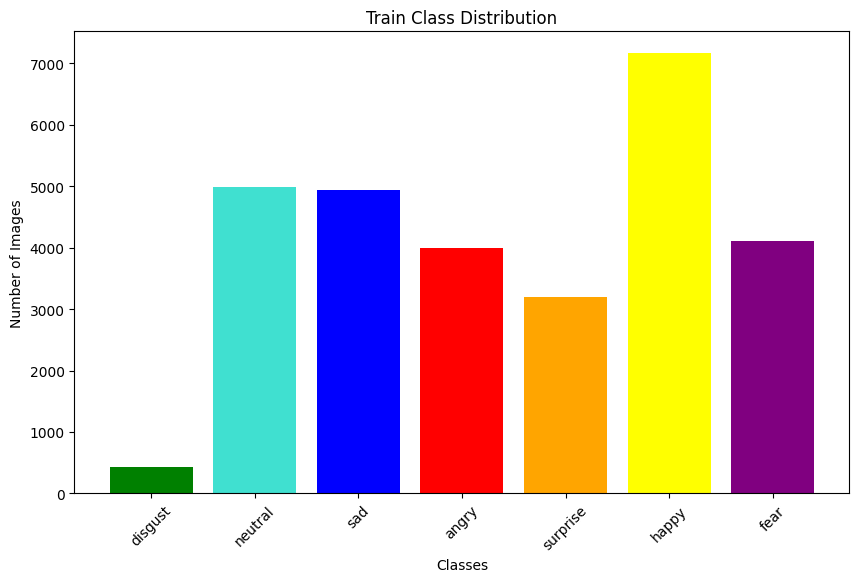

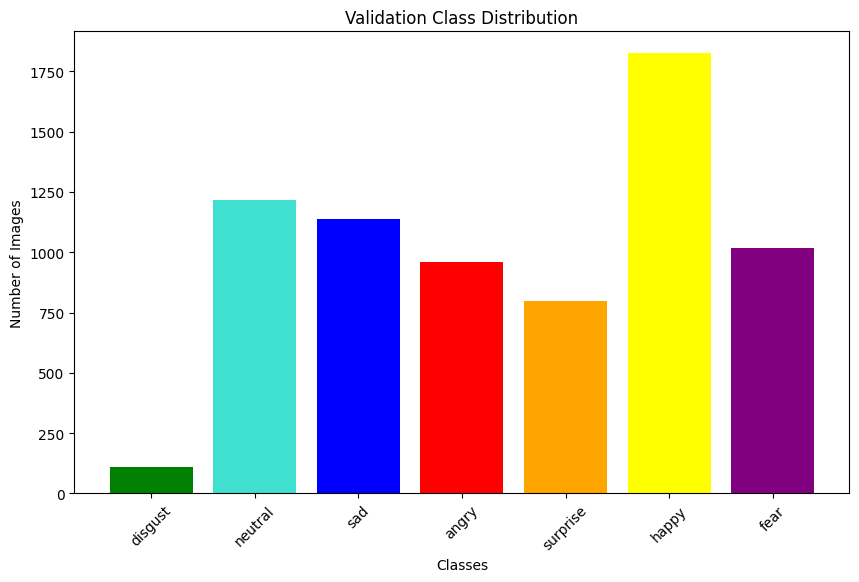

In [8]:
import matplotlib.pyplot as plt

# Class names and number of images in the class for train folder
class_names = ['disgust', 'neutral', 'sad','angry','surprise','happy','fear']
class_counts = [436, 4982, 4938, 3993, 3205, 7164, 4103]

colors = ['green', 'turquoise', 'blue', 'red', 'orange', 'yellow', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Class Distribution')
plt.xticks(rotation=45)
plt.show()


# Class names and number of images in the class validation folder
class_names = ['disgust', 'neutral', 'sad','angry','surprise','happy','fear']
class_counts = [111, 1216, 1139, 960, 797, 1825, 1018]

colors = ['green', 'turquoise', 'blue', 'red', 'orange', 'yellow', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Validation Class Distribution')
plt.xticks(rotation=45)
plt.show()


**Visualization of the sample image**

This step allows us to learn about the dataset by selecting a random image from the dataset.

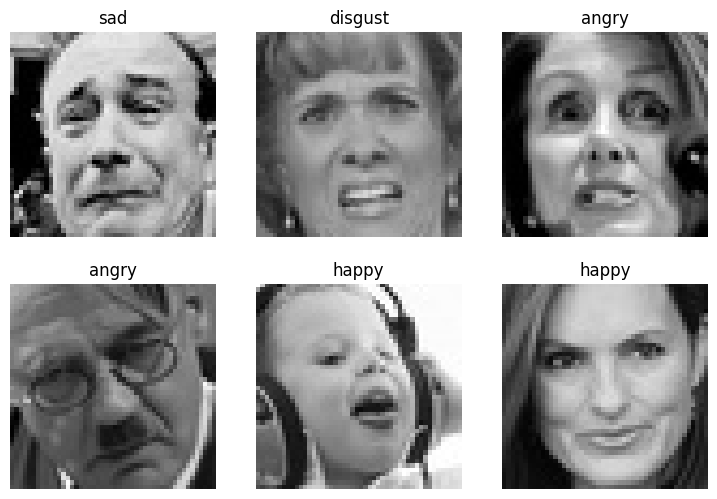

In [19]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content/images/images'

class_train = os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

class_validation = os.path.join(data_dir, 'validation')
validation_sub_classes = [sub_class for sub_class in os.listdir(class_validation) if os.path.isdir(os.path.join(class_validation, sub_class))]

# Merge 'Train' and 'Validation' subclasses
all_classes = train_sub_classes + validation_sub_classes

# 6 different random images to show
num_images_to_show = 6

plt.figure(figsize=(9, 6))

for i in range(num_images_to_show):
    # Randomly select one of the subclasses
    selected_class = random.choice(all_classes)

    # Check if the selected subclass is in the "train" or "validation" folders and create the file path
    if selected_class in train_sub_classes:
        selected_class_path = os.path.join(class_train, selected_class)
    else:
        selected_class_path = os.path.join(class_validation, selected_class)

    # Randomly select an image from the selected subclass
    sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

    # Reading the image
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show image as a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(selected_class)

plt.show()

The images in the dataset are in black and white. So we will not need color editing.

**Creating 'Test' data set from 'Train' data set**